Take Home Assignment 02: Liquid Level

1. Analyzing the liquid level of a vessel will be studied in this assignment
2. How to utilize background subtraction is demonstrated in the notebook
3. How to use subsequent thresholding and contour analysis is also demonstrated
4. The student's task is to implement the demonstrated techniques to obtain a liquid level plot for the entirety of the video

Notes:
It is advised to go over the opencv documentation for the following functions

cv2.threshold  :  https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html




Student has to deliver:
1. Plot of the liquid level.
2. A brief note on what the student understood by reading the section on Otsu's threholding method.
3. 2 examples of probable erroraneous liquid level readings, when using Otsu's method. Show with annoted images.
4. A brief description on the final algorithm developed by the student.


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

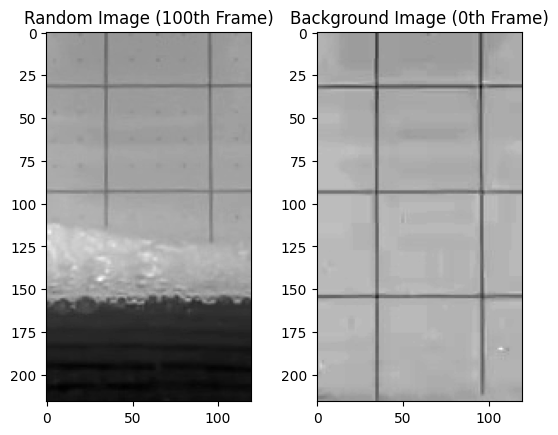

In [ ]:
# Importing Demo Images
img_r = cv2.imread('demo2_images/liquid_frame100.jpg', 0)
img_b = cv2.imread('demo2_images/liquid_frame000.jpg', 0)

# Display the images
plt.subplot(121), plt.imshow(img_r, cmap='gray'), plt.title('Random Image (100th Frame)')
plt.subplot(122), plt.imshow(img_b, cmap='gray'), plt.title('Background Image (0th Frame)')
plt.show()

Method 1 : Background Subtraction

Threshold Value: 50.0
Contour 0 Area: 6826.0
Contour 1 Area: 0.0
Contour 2 Area: 0.0
Largest Contour Size: 6826.0
Total Area: 25920
Percentage: 26.3 %


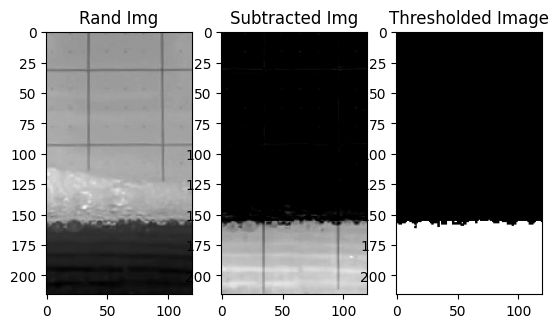

In [ ]:
# Subtracting the images
img_sub = cv2.subtract(img_b, img_r)

# Thresholding the image, to obtain binary image
ret, img_sub_thresh = cv2.threshold(img_sub, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# Print the used threshold value
print('Threshold Value:', ret)

# Find contours in the image
contours, hierarchy = cv2.findContours(img_sub_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours by size in descending order
contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)
# Print the contour areas
for i in range(len(contours)):
    print('Contour', i, 'Area:', cv2.contourArea(contours[i]))

# Find the area of the whole image
rows, cols = img_sub_thresh.shape
total_area = rows * cols
print('Total Area:', total_area)

# Calculate the percentage of the largest contour area, rounded to 1 decimal point
percentage = round((cv2.contourArea(contours[0]) / total_area) * 100, 1)
print('Percentage:', percentage, '%')

# Display img_r , img_sub, img_sub_thresh side by side using plt
plt.subplot(131), plt.imshow(img_r, cmap='gray'), plt.title('Rand Img')
plt.subplot(132), plt.imshow(img_sub, cmap='gray'), plt.title('Subtracted Img')
plt.subplot(133), plt.imshow(img_sub_thresh, cmap='gray'), plt.title('Thresholded Image')
plt.show()

How to read video files

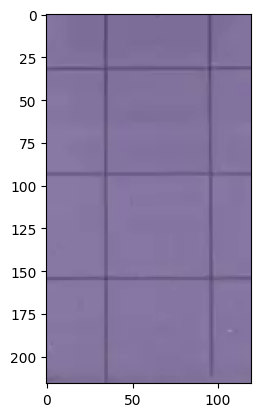

True

In [ ]:
# Reading frames from a video
cap = cv2.VideoCapture('demo2_images/liquidVideo.mp4')
ret, frame1 = cap.read()

# Displaying the first frame using plt
plt.imshow(frame1)
plt.show()





---



***Assignment ANSWERs***

**Q1.**  

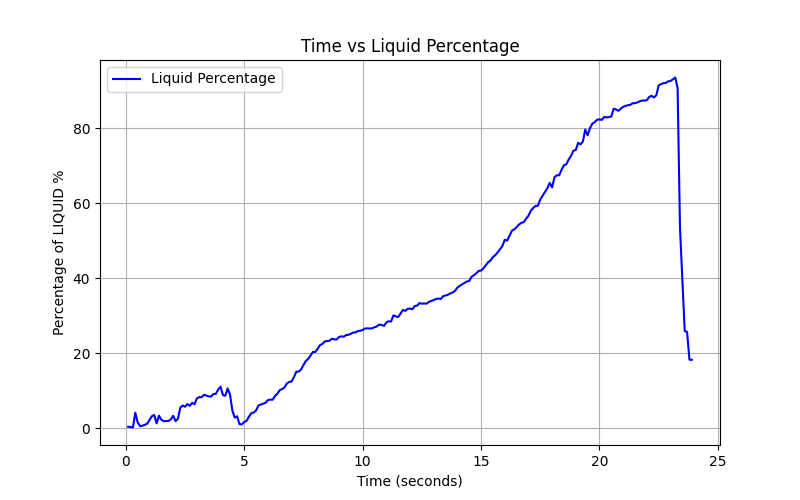



---



**Q2**

***Thresholding Method***

it is an advanced thresholding technique used to determine an optimal global threshold value for image binarization automatically. Unlike global thresholding, where a predefined threshold value is used, Otsu's method calculates the best threshold based on the histogram of the image.

The method works well for bimodal images (images with two distinct peaks in their histogram), where the optimal threshold lies between these peaks.
1. Automation of Threshold Selection-
 Otsu's method eliminates the need for manual selection of a threshold value by computing it from the image's histogram.

2. Noise Handling-
Applying Otsu's thresholding on a noise-filtered image (e.g., using a Gaussian blur) significantly improves the results by reducing the impact of noise.

3. Implementation-
 The method is implemented using the `cv.threshold()` function with the `cv.THRESH_OTSU` flag, where the optimal threshold value is returned as an output.

By comparing global thresholding and Otsu's method with and without noise filtering, the student observed that filtering the image before applying Otsu's thresholding yields better segmentation results, especially for noisy images.



---



**Q3**

*Erroraneous liquid level readings, when using Otsu's method.*

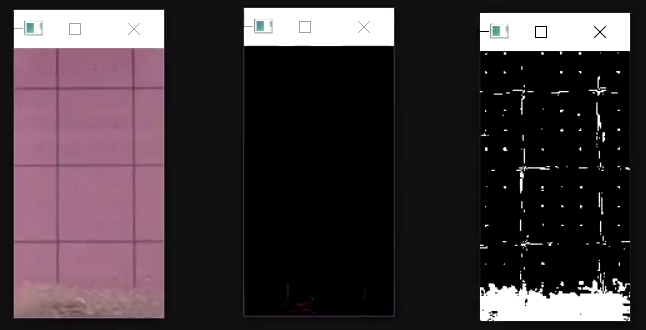



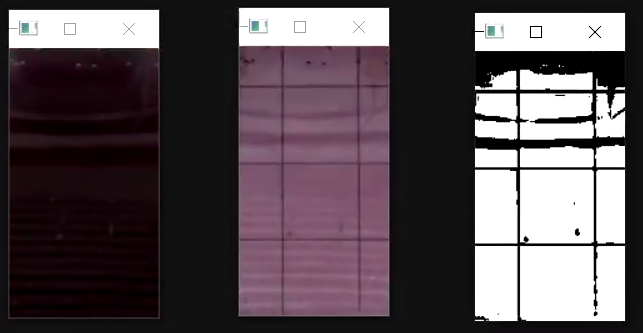





---



**Q4**

Algorithm Description

The implemented algorithm processes a video to analyze the percentage of liquid detected in each frame and visualizes it as a function of time. Below is a concise breakdown of its key stages:


### **1. Initialization**
- **Video Input**: Opens the video file and retrieves the first frame as the background reference for subtraction.
- **Frame Rate (FPS)**: Extracts FPS to calculate timestamps for each frame.
- **Data Storage**: Initializes lists to store liquid percentages and corresponding times.

---

### **2. Frame Processing**
- For each video frame:
  1. **Background Subtraction**: Computes the difference between the background and the current frame.
  2. **Grayscale Conversion**: Converts the subtracted image to grayscale for processing.
  3. **Thresholding**: Applies Otsu's thresholding to segment liquid regions.
  4. **Contour Detection**: Identifies and measures the largest contour area representing the liquid.
  5. **Percentage Calculation**: Calculates the liquid percentage as the ratio of the largest contour area to the total frame area.

---

### **3. Real-Time Visualization**
- Displays the original, subtracted, and thresholded frames during processing.
- The loop can be terminated manually by pressing 'q'.

---

### **4. Result Analysis**
- After processing all frames, the algorithm plots **Time vs. Liquid Percentage**, providing insights into liquid behavior over time.



In [1]:
#program Code

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def process_video(video_path):
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error: Unable to open video file {video_path}")
        return

    ret, background = cap.read()
    if not ret:
        print("Error: Unable to read the first frame.")
        cap.release()
        return

    fps = cap.get(cv2.CAP_PROP_FPS)  # Get frames per second
    percentages = []
    times = []

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Process the current frame
        img_sub = cv2.absdiff(background, frame)
        img_sub_gray = cv2.cvtColor(img_sub, cv2.COLOR_BGR2GRAY)

        # Apply Otsu's thresholding
        _, img_sub_thresh = cv2.threshold(img_sub_gray, 10, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Find the largest contour
        contours, _ = cv2.findContours(img_sub_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        if contours:
            largest_contour_area = max(cv2.contourArea(c) for c in contours)
            frame_area = frame.shape[0] * frame.shape[1]
            percentage = (largest_contour_area / frame_area) * 100
        else:
            percentage = 0

        percentages.append(percentage)
        times.append(len(percentages) / fps)  # Calculate time in seconds

        # Display the video and processed frames
        cv2.imshow('Original Frame', frame)
        cv2.imshow('Subtracted Frame', img_sub)
        cv2.imshow('Thresholded Frame', img_sub_thresh)

        # Break the loop on pressing 'q'
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

    # Plot time vs percentage
    plt.figure(figsize=(8, 5))
    plt.plot(times, percentages, label='Liquid Percentage', color='blue')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Percentage of LIQUID %')
    plt.title('Time vs Liquid Percentage')
    plt.grid(True)
    plt.legend()
    plt.show()

# Call the function with the video path
video_path = 'demo2_images/liquidVideo.mp4'
process_video(video_path)
